In [91]:
import os
import pandas as pd
from dotenv import load_dotenv

load_dotenv("../.env")

df = pd.read_csv(os.getenv("LOCAL_LESSON6_DS"))

In [92]:
df = df.drop(columns=['PassengerId'])

In [93]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [94]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [95]:
df['Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [96]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [97]:
df = pd.concat([df, pd.get_dummies(df['Sex'], prefix="Sex", drop_first=True)], axis=1)

In [98]:
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix="Embarked", drop_first=True)], axis=1)

In [99]:
df = pd.concat([df, pd.get_dummies(df['Pclass'], prefix="Pclass", drop_first=True)], axis=1)

In [100]:
df['FamSize'] = df['SibSp'] + df['Parch']

In [101]:
df_copy = df.copy()

In [102]:
df_copy = df_copy.drop(columns=['Sex', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Pclass'])

In [103]:
x = df_copy.drop(columns=['Survived'])
y = df_copy['Survived']

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [110]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x_scale)

In [111]:
labels_km = kmeans.labels_

In [112]:
x.columns

Index(['Age', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2',
       'Pclass_3', 'FamSize'],
      dtype='object')

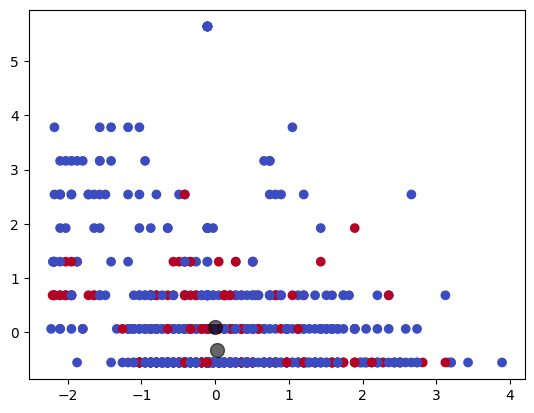

In [119]:
import matplotlib.pyplot as plt

plt.scatter(x_scale[:, 0], x_scale[:, 7], c=labels_km, cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=100, alpha=0.6)
plt.show()

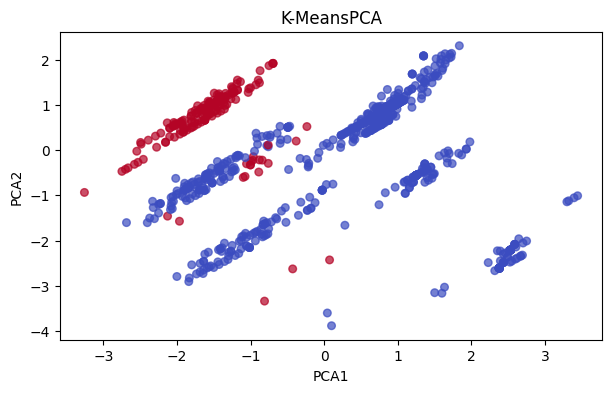

In [146]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(x_scale)

plt.figure(figsize=(7,4))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels_km, cmap='coolwarm', s=30, alpha=0.7)
plt.title('K-MeansPCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [139]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.3, min_samples=2).fit(x_scale)

In [140]:
labels_dbs = dbscan.labels_

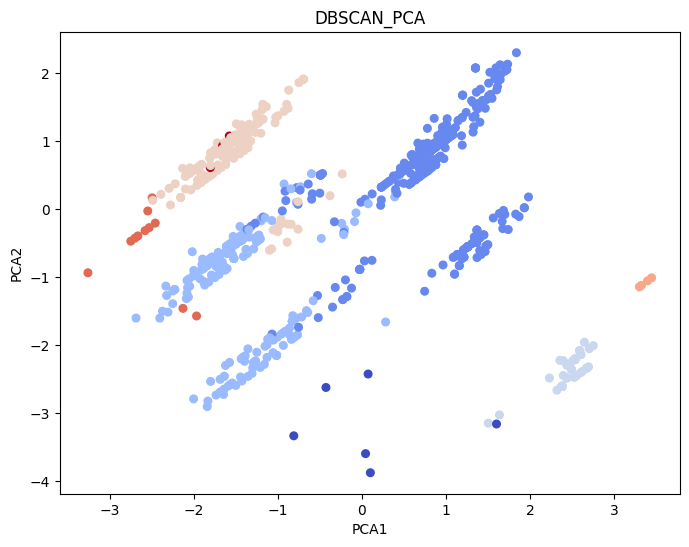

In [145]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(x_scale)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels_dbs, cmap='coolwarm', s=30, alpha=1)
plt.title('DBSCAN_PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [142]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering().fit(x_scale)
labels_ag = ag.labels_

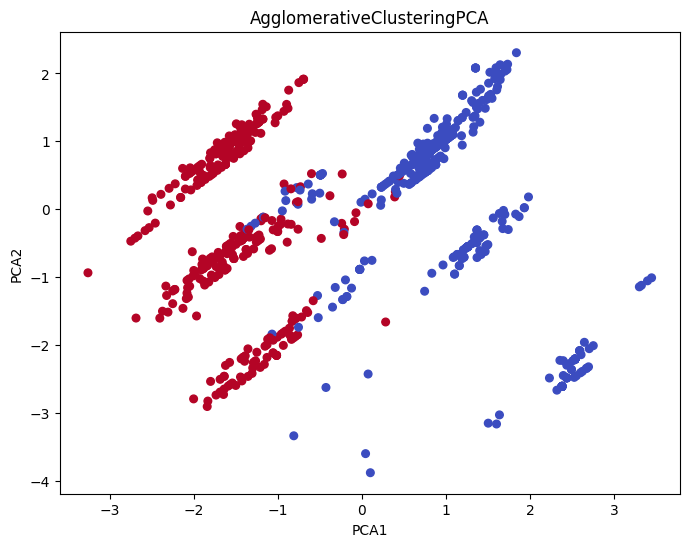

In [144]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(x_scale)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels_ag, cmap='coolwarm', s=30, alpha=1)
plt.title('AgglomerativeClusteringPCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [152]:
# AgglomerativeClustering работает на расстоянии меж объектами (иерархическая кластеризация)
# Но если дать матрицу смежности (или похожести, преобразованную в расстояния), то это будет кластеризация по графу

from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering

A = kneighbors_graph(x_scale, n_neighbors=8, include_self=False)
A = 0.5 * (A + A.T)

ag_graph = AgglomerativeClustering(n_clusters=2, metric='precomputed', linkage='average')
labels_ag_graph = ag_graph.fit_predict(1 - A.toarray())

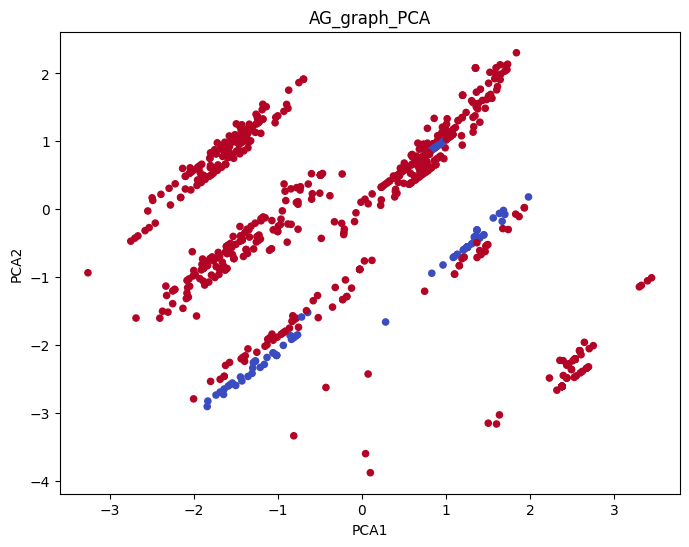

In [154]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(x_scale)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels_ag_graph, cmap='coolwarm', s=20, alpha=1)
plt.title('AG_graph_PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()